In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [5]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [7]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [15]:
training_set

In [16]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
13/13 [==============================] - 234s 18s/step - loss: 1.6485 - accuracy: 0.4928 - val_loss: 2.0111 - val_accuracy: 0.3209
Epoch 2/50
13/13 [==============================] - 197s 15s/step - loss: 0.8350 - accuracy: 0.5913 - val_loss: 0.6704 - val_accuracy: 0.6791
Epoch 3/50
13/13 [==============================] - 191s 15s/step - loss: 0.6510 - accuracy: 0.6779 - val_loss: 0.4832 - val_accuracy: 0.7313
Epoch 4/50
13/13 [==============================] - 194s 15s/step - loss: 0.3935 - accuracy: 0.8269 - val_loss: 0.5211 - val_accuracy: 0.7687
Epoch 5/50
13/13 [==============================] - 202s 16s/step - loss: 0.3246 - accuracy: 0.8678 - val_loss: 0.4280 - val_accuracy: 0.8134
Epoch 6/50
13/13 [==============================] - 216s 17s/step - loss: 0.2886 - accuracy: 0.8894 - val_loss: 0.3804 - val_accuracy: 0.8134
Epoch 7/50
13/13 [==============================] - 199s 15s/step - loss

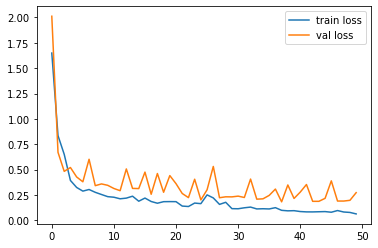

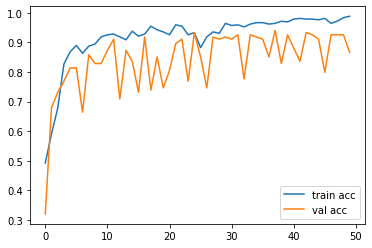

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [20]:

y_pred = model.predict(test_set)


In [21]:
y_pred

array([[9.99999881e-01, 8.19037922e-08],
       [5.07808849e-02, 9.49219108e-01],
       [9.91054714e-01, 8.94527789e-03],
       [6.36914372e-01, 3.63085598e-01],
       [8.24249506e-01, 1.75750539e-01],
       [9.99920726e-01, 7.92402134e-05],
       [8.38262260e-01, 1.61737770e-01],
       [9.99491215e-01, 5.08728612e-04],
       [8.71060863e-02, 9.12893951e-01],
       [2.91033179e-01, 7.08966792e-01],
       [9.99983072e-01, 1.69554824e-05],
       [6.80609345e-02, 9.31939065e-01],
       [7.43812323e-02, 9.25618768e-01],
       [6.60108700e-02, 9.33989108e-01],
       [1.96389481e-02, 9.80360985e-01],
       [9.80451047e-01, 1.95489097e-02],
       [9.98845339e-01, 1.15462311e-03],
       [7.69935369e-01, 2.30064690e-01],
       [4.50530380e-01, 5.49469650e-01],
       [9.91302133e-01, 8.69783945e-03],
       [4.33593197e-03, 9.95664060e-01],
       [9.99620199e-01, 3.79778445e-04],
       [7.49738932e-01, 2.50261039e-01],
       [9.96565044e-01, 3.43498308e-03],
       [6.041836

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1], dtype=int64)

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('model_vgg19.h5')

In [26]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))



In [27]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [28]:
x.shape

(224, 224, 3)

In [29]:
x=x/255

In [30]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

array([[2.7151957e-05, 9.9997282e-01]], dtype=float32)

In [32]:
a=np.argmax(model.predict(img_data), axis=1)

In [33]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
